# EDA

Признаки
1. `Район` - район, в котором находится находится квартира
2. `Улица` - улица, на которой находится дом
3. `Станция метро` - ближайшая к дому станция метро
4. `Время до метро`, мин. - время до ближайшей станции метро
5. `Количество комнат` - количество комнат в квартире
6. `Общая площадь, м.кв.` - общая площадь квартиры
7. `Жилая площадь, м.кв.` - площадь жилых комнат квартиры
8. `Цена` - цена квартиры
9. `Год постройки` - год постройки дома
10. `Тип дома` - тип постройки дома
11. `Этаж` - этаж, на котором находится квартира
12. `Количество этажей в доме`- общее количество этажей в доме, в котором находится квартира
13. `Площадь кухни, м.кв`. - площадь помещения кухни
14. `Количество санузлов` - количество санузлов в кваптире
15. `Тип ремонта` - тип ремонта в квартире
16. `Количество подъездов` в доме - количество подъездов в доме
`Цена` - целевая переменная

In [48]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Откроем файл с данными после парсинга

In [49]:
data = pd.read_csv('cian.csv')
print(data.shape)
data.head()


(1052, 16)


,Район,Улица,Станция метро,"Время до метро, мин.",Количество комнат,"Общая площадь, м.кв.","Жилая площадь, м.кв.",Цена,Год постройки,Тип дома,Этаж,Количество этажей в доме,"Площадь кухни, м.кв.",Количество санузлов,Тип ремонта,Количество подъездов в доме
0,Хамовники,ул. Ефремова,Фрунзенская,6,2,78.00,-,102999000.0,-,Монолитно-кирпичный,7,12,10.2,2,Евроремонт,-
1,Пресненский,2-я Звенигородская ул.,Улица 1905 года,7,3,116.80,-,120000000.0,2023,-,5,21,-,2,Евроремонт,1
2,Пресненский,2-я Звенигородская ул.,Улица 1905 года,7,3,116.78,-,120000000.0,2023,-,5,21,-,2,Евроремонт,1
3,Пресненский,ул. Костикова,Улица 1905 года,9,2,51.00,-,52000000.0,2023,-,3,21,-,1,Евроремонт,-
4,Головинский,ул. Лавочкина,Водный стадион,4,2,44.00,27.0,10000000.0,1968,Панельный,8,9,7.0,1,Без ремонта,8


Поменяем в некоторых столбцах тип данных на int, удалим дубликат, заменим пустые значения на 0, а '-' на пустые значения у не количественных показателей, посчитаем медианы по количественным, заменим 0 на на значения медиан по соответствующим показателям

In [50]:
df = data[data['Цена'].notna()]
df = df.drop(2)
print(df.shape)
df = df.replace('-', np.nan)
df['Время до метро, мин.'] = df['Время до метро, мин.'].replace('откроется в 2024', 0).astype(int)
med_time = df['Время до метро, мин.'].median()
df['Время до метро, мин.'] = df['Время до метро, мин.'].replace(0, 9)
df['Жилая площадь, м.кв.'] = pd.to_numeric(df['Жилая площадь, м.кв.'], errors='coerce').fillna(0).round().astype(int)
med_liv_ar = df['Жилая площадь, м.кв.'].median()
df['Жилая площадь, м.кв.'] = df['Жилая площадь, м.кв.'].replace(0, 24)
df['Площадь кухни, м.кв.'] = pd.to_numeric(df['Площадь кухни, м.кв.'], errors='coerce').fillna(0).round().astype(int)
med_k_ar = df['Площадь кухни, м.кв.'].median()
df['Площадь кухни, м.кв.'] = df['Площадь кухни, м.кв.'].replace(0, 10)
df['Количество санузлов'] = pd.to_numeric(df['Количество санузлов'], errors='coerce').fillna(0).round().astype(int)
med_s = df['Количество санузлов'].median()
df['Количество санузлов'] = df['Количество санузлов'].replace(0, 1)
df['Количество подъездов в доме'] = pd.to_numeric(df['Количество подъездов в доме'], errors='coerce').fillna(0).round().astype(int)
med_ent = df['Количество подъездов в доме'].median()
df['Количество подъездов в доме'] = df['Количество подъездов в доме'].replace(0, 3)
df['Год постройки'] = pd.to_numeric(df['Год постройки'], errors='coerce').fillna(0).round().astype(int)
med_y = df['Год постройки'].median()
df['Год постройки'] = df['Год постройки'].replace(0, 2003)
df.to_csv(r'cian1.csv', index = False)
print(med_time, med_liv_ar, med_k_ar, med_s, med_ent, med_y)
df.head()

(1049, 16)
9.0 24.0 10.0 1.0 3.0 2003.0


,Район,Улица,Станция метро,"Время до метро, мин.",Количество комнат,"Общая площадь, м.кв.","Жилая площадь, м.кв.",Цена,Год постройки,Тип дома,Этаж,Количество этажей в доме,"Площадь кухни, м.кв.",Количество санузлов,Тип ремонта,Количество подъездов в доме
0,Хамовники,ул. Ефремова,Фрунзенская,6,2,78.0,24,102999000.0,2003,Монолитно-кирпичный,7,12,10,2,Евроремонт,3
1,Пресненский,2-я Звенигородская ул.,Улица 1905 года,7,3,116.8,24,120000000.0,2023,NaN,5,21,10,2,Евроремонт,1
3,Пресненский,ул. Костикова,Улица 1905 года,9,2,51.0,24,52000000.0,2023,NaN,3,21,10,1,Евроремонт,3
4,Головинский,ул. Лавочкина,Водный стадион,4,2,44.0,27,10000000.0,1968,Панельный,8,9,7,1,Без ремонта,8
5,Мещанский,Рождественский бул.,Трубная,4,3,140.0,100,227576030.0,1903,Кирпичный,2,4,26,2,NaN,4


Используем метод describe, чтобы узнать мат ожидание, стандартное отклонение и т.д.

In [51]:
df.describe()

,"Время до метро, мин.",Количество комнат,"Общая площадь, м.кв.","Жилая площадь, м.кв.",Цена,Год постройки,Этаж,Количество этажей в доме,"Площадь кухни, м.кв.",Количество санузлов,Количество подъездов в доме
count,1049.000000,1049.000000,1049.000000,1049.000000,1.049000e+03,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000,1049.000000
mean,9.337464,2.224023,76.629905,35.158246,6.078524e+07,1995.111535,8.427073,16.761678,12.262154,1.416587,4.155386
std,4.429746,0.781681,40.281175,20.460578,7.317024e+07,29.305543,7.483740,11.579069,7.406730,0.610774,3.265841
min,1.000000,1.000000,26.800000,5.000000,5.600000e+06,1820.000000,1.000000,3.000000,4.000000,1.000000,1.000000
25%,6.000000,2.000000,44.000000,24.000000,1.380000e+07,1973.000000,3.000000,9.000000,8.000000,1.000000,2.000000
50%,9.000000,2.000000,65.000000,24.000000,3.070000e+07,2003.000000,6.000000,14.000000,10.000000,1.000000,3.000000
75%,12.000000,3.000000,99.900000,43.000000,7.700000e+07,2020.000000,10.000000,21.000000,15.000000,2.000000,5.000000
max,27.000000,3.000000,250.000000,177.000000,5.630642e+08,2024.000000,49.000000,78.000000,95.000000,3.000000,26.000000


Используем метод corr с парметром numeric_only=True, чтобы узнать как числовые переменные коррелируют друг с другом

In [69]:
df.corr(numeric_only=True)

,"Время до метро, мин.",Количество комнат,"Общая площадь, м.кв.","Жилая площадь, м.кв.",Цена,Год постройки,Этаж,Количество этажей в доме,"Площадь кухни, м.кв.",Количество санузлов,Количество подъездов в доме
"Время до метро, мин.",1.000000,-0.091022,-0.169164,-0.023520,-0.200851,0.104445,0.061850,0.110305,-0.043793,-0.162751,0.040695
Количество комнат,-0.091022,1.000000,0.701716,0.502991,0.489609,-0.006632,-0.020122,0.023615,0.204758,0.521841,0.044661
"Общая площадь, м.кв.",-0.169164,0.701716,1.000000,0.506041,0.829797,0.133578,-0.041583,0.023945,0.429601,0.736496,-0.000812
"Жилая площадь, м.кв.",-0.023520,0.502991,0.506041,1.000000,0.391004,0.015348,-0.091511,-0.019536,0.242598,0.327248,0.012855
Цена,-0.200851,0.489609,0.829797,0.391004,1.000000,0.133032,-0.110624,-0.107778,0.364335,0.680940,-0.020737
Год постройки,0.104445,-0.006632,0.133578,0.015348,0.133032,1.000000,0.315225,0.467725,0.284272,0.197687,0.024774
Этаж,0.061850,-0.020122,-0.041583,-0.091511,-0.110624,0.315225,1.000000,0.651812,0.164872,-0.014327,-0.040197
Количество этажей в доме,0.110305,0.023615,0.023945,-0.019536,-0.107778,0.467725,0.651812,1.000000,0.167775,0.032941,-0.039620
"Площадь кухни, м.кв.",-0.043793,0.204758,0.429601,0.242598,0.364335,0.284272,0.164872,0.167775,1.000000,0.333357,-0.027721
Количество санузлов,-0.162751,0.521841,0.736496,0.327248,0.680940,0.197687,-0.014327,0.032941,0.333357,1.000000,-0.028178


Создадим матрицу корреляции

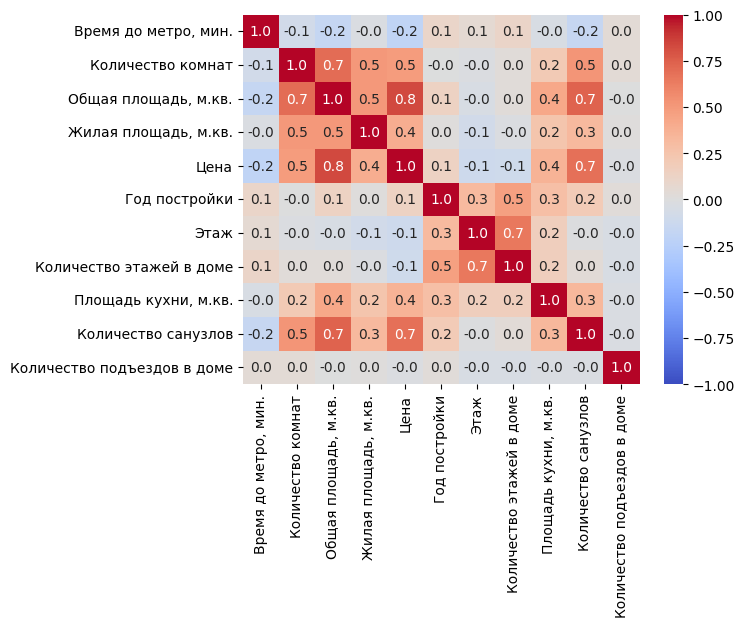

In [54]:
sns.heatmap(df1.corr(), annot=True, fmt = '0.1f', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')
plt.show()

Из матрицы корреляции становится видно, что существуют довольно сильные положительные зависимости между общей площадью и ценой, кол-вом комнат и общей площадью, количеством комнат и ценой, общей площадью и кол-вом санузлов, ценой и кол-вом санузлов, кол-вом комнат и кол-вом санузлов, этажом квартиры и количеством этажей в доме, количеством этажей в доме и годом постройки; несильные отрицательные зависимости между: временем до метро и ценой, временем до метро и общей площадью, ценой и этажом, кол-вом этажей в доме и ценой.

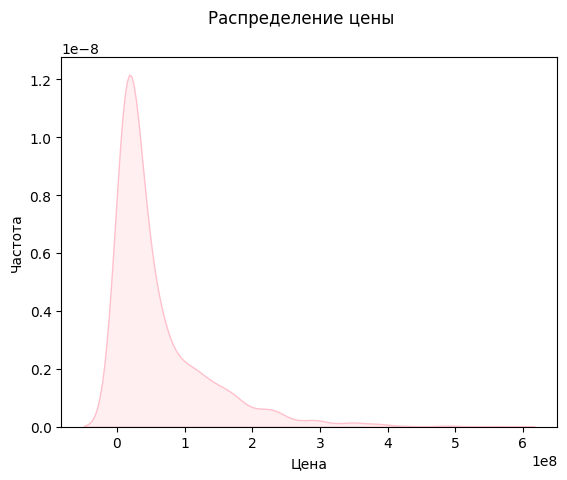

In [55]:
sns.kdeplot(df['Цена'], color = 'pink', fill = True)
plt.suptitle('Распределение цены')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.show()

Из графика видим, что распределение цены похоже на нормальное, но мода, мат. ожидание и медиана смещены влево. Это может говорить о будущем росте цен на квартиры и смещении моды, мат. ожидания и медианы к центру графика

Построим гистограмму распределения общей площади квартир

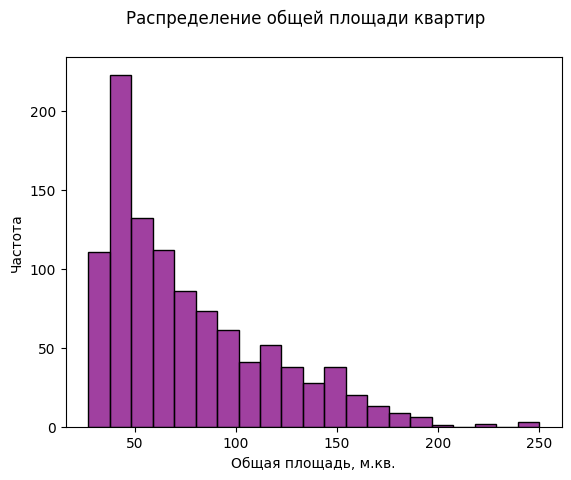

In [56]:
sns.histplot(df['Общая площадь, м.кв.'], color = 'purple')
plt.suptitle('Распределение общей площади квартир')
plt.xlabel('Общая площадь, м.кв.')
plt.ylabel('Частота')
plt.show()

Можно заметить, что чаще всего встречаются квартиры площадью менее 50 кв.м.
Узнаем моду этого показателя:

In [70]:
df['Общая площадь, м.кв.'].mode()

0    38.0
1    44.0
Name: Общая площадь, м.кв., dtype: float64

У показателя две моды: 38 кв.м. и 44 кв.м.

Построим гистограмму распределения жилой площади квартир

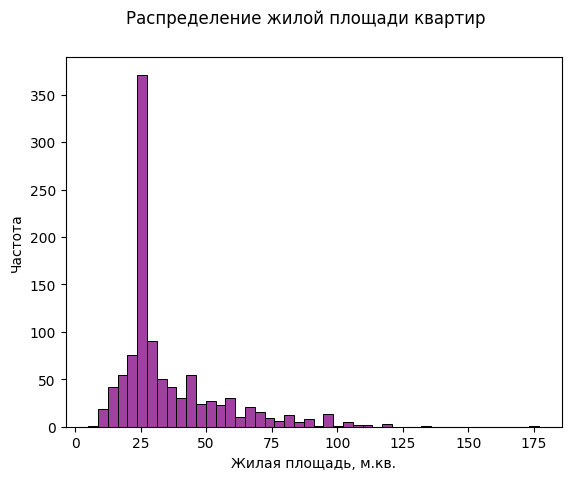

In [72]:
sns.histplot(df['Жилая площадь, м.кв.'], color = 'purple')
plt.suptitle('Распределение жилой площади квартир')
plt.xlabel('Жилая площадь, м.кв.')
plt.ylabel('Частота')
plt.show()

Не считая 24 кв.м. (так как этим значением были заполнены пустые значения), чаще всего встречаются квартиры с жилой площадью чуть больше 25 кв.м.

Узнаем список уникальных районов в выборке

In [58]:
print(df['Район'].nunique())
df['Район'].unique()

114


array(['Хамовники', 'Пресненский', 'Головинский', 'Мещанский',
       'Хорошево-Мневники', 'Гольяново', 'Люблино', 'Арбат', 'Тверской',
       'Кузьминки', 'Ясенево', 'Черемушки', 'Некрасовка', 'поселение',
       'Печатники', 'Проспект', 'Южнопортовый', 'Замоскворечье',
       'Дорогомилово', 'Очаково-Матвеевское', 'Отрадное', 'Хорошевский',
       'Лосиноостровский', 'Новогиреево', 'Свиблово', 'Басманный',
       'Фили-Давыдково', 'Раменки', 'Южное', 'Даниловский', 'Якиманка',
       'Алтуфьевский', 'Митино', 'Таганский', 'Академический',
       'Сокольники', 'Нагатино-Садовники', 'Соколиная', 'Нагорный',
       'Матушкино', 'Чертаново', 'Дмитровский', 'Коптево', 'Аэропорт',
       'Марьина', 'Усадебный', 'Зябликово', 'Северное', 'Марьино',
       'Перово', 'Восточное', 'Донской', 'Красносельский', 'Нагатинский',
       'Царицыно', 'Бутырский', 'Кунцево', 'Сокол', 'Ярославский',
       'Крылатское', 'Нижегородский', 'Филевский', 'Бибирево',
       'Преображенское', 'Рязанский', 'Брат

В массиве районов попадаются такие элементы, как "поселок", "дп", "поселение", "рп". Вероятно, квартиры находятся в поселениях, входящих в состав города.

Построим график распределения по районам

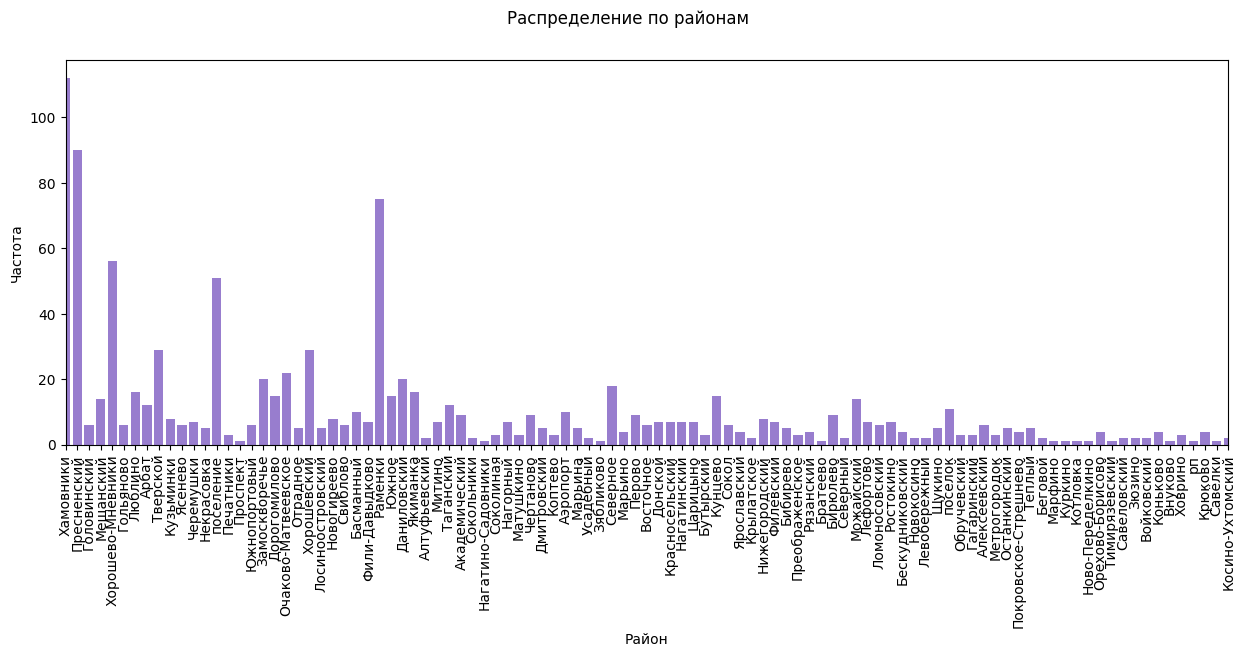

In [59]:
plt.figure(figsize=(15, 5))
sns.countplot(x='Район', data=df, color = 'mediumpurple')
plt.suptitle('Распределение по районам')
plt.xlabel('Район')
plt.ylabel('Частота')
plt.xticks(rotation=90)
plt.xlim(0, 100)
plt.show()

Из графика видно, что больше всего квартир продается в районах Хамовники, Пресненский, Раменки, Хорошово-мневники, Тверской, Хорошевский, а также в различных поселениях

Построим график распределения количества комнат 

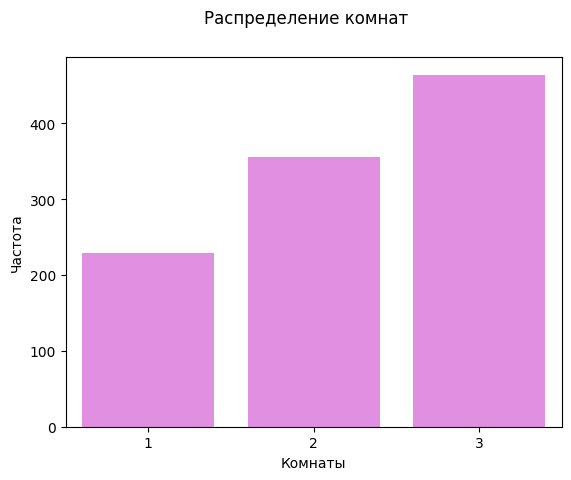

In [60]:
sns.countplot(x='Количество комнат', data=df, color = 'violet')
plt.suptitle('Распределение комнат')
plt.xlabel('Комнаты')
plt.ylabel('Частота')

plt.show()

В выборке больше всего 3-комнатных квартир

Создадим таблицу, в которой индексами будут названия районов, а в колонке кол-во квартир, которые продаются в этих районах

In [61]:
distr_table = df.pivot_table(df, index = 'Район', aggfunc = len)
distr_table = distr_table.drop(distr_table.columns.difference(['Улица']), axis=1)

distr_table

,Улица
Район,
Академический,9
Алексеевский,6
Алтуфьевский,2
Арбат,12
Аэропорт,10
...,...
Ясенево,6
дп,2
поселение,51


Проверим, верен ли график распределения по районам

In [62]:
max_distr = distr_table['Улица'].nlargest(10).index
max_distr

Index(['Хамовники', 'Пресненский', 'Раменки', 'Хорошево-Мневники', 'поселение',
       'Тверской', 'Хорошевский', 'Очаково-Матвеевское', 'Даниловский',
       'Замоскворечье'],
      dtype='object', name='Район')

Данные из таблицы совпадают с данными графика

Построим точечный график зависимости цены квартиры от района, в котором она находится

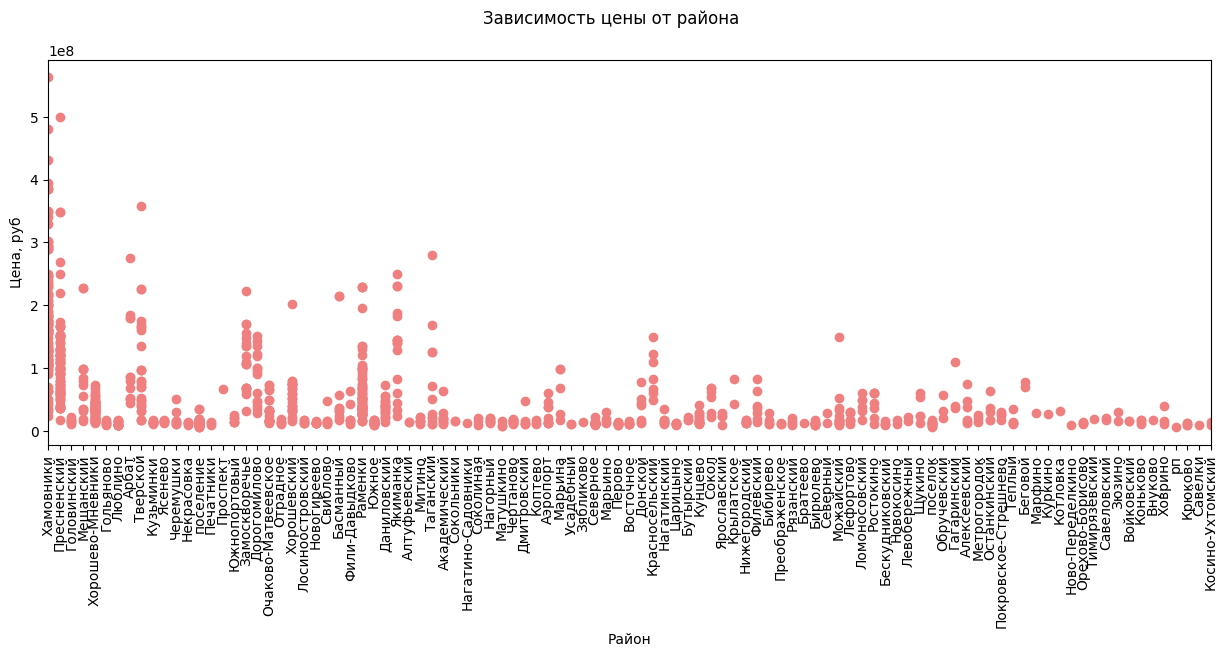

In [63]:
plt.figure(figsize=(15, 5))
plt.scatter(df['Район'], df['Цена'], color='lightcoral')
plt.xticks(rotation=90)
plt.xlim(0, 100)
plt.suptitle('Зависимость цены от района')
plt.xlabel('Район')
plt.ylabel('Цена, руб')
plt.show()


Самые дорогие квартиры в районах Хамовники, Пресненский, Арбат, Замоскворечье, Тверской, Якиманка, Раменки, Таганский

Построим график зависимости площади квартиры от района, в котором она находится

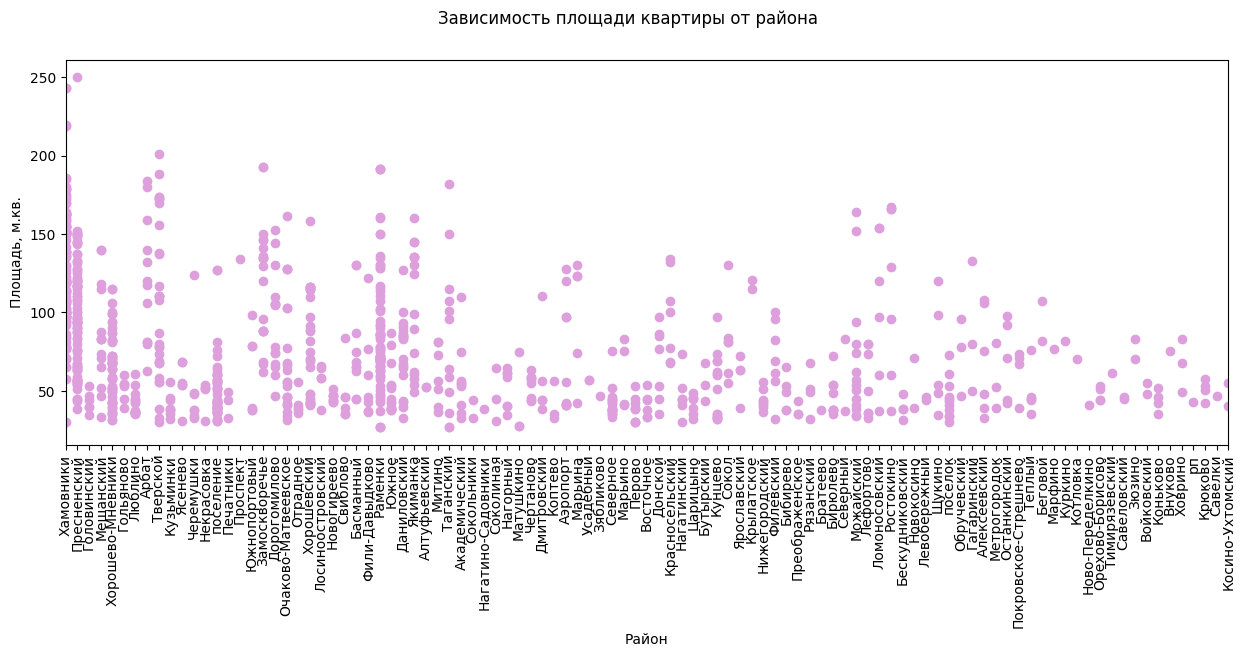

In [64]:
plt.figure(figsize=(15, 5))
plt.scatter(df['Район'], df['Общая площадь, м.кв.'], color='plum')
plt.xlim(0, 100)
plt.xticks(rotation=90)
plt.suptitle('Зависимость площади квартиры от района')
plt.xlabel('Район')
plt.ylabel('Площадь, м.кв.')
plt.show()


Самые большие квартиры находятся ближе к центру города в районах Хамовники, Пресненский, Арбат, Тверской, Раменки, а самые маленькие в районах Черемушки, Печатники, Лосиноостровский, Новогиреево, Сокольники, Преображенское, Свиблово

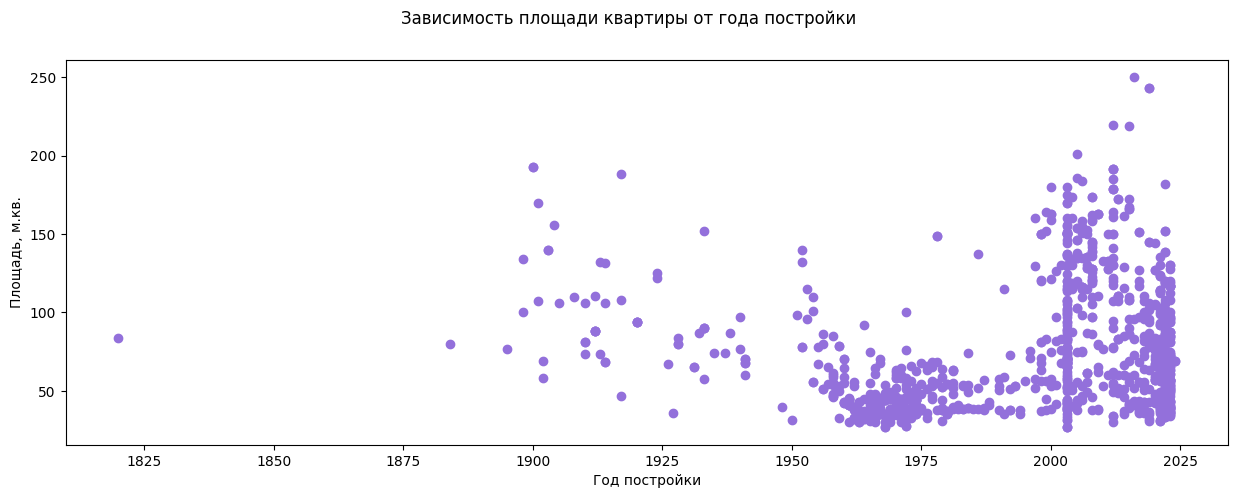

In [65]:
plt.figure(figsize=(15, 5))
plt.scatter(df['Год постройки'], df['Общая площадь, м.кв.'], color='mediumpurple')
plt.suptitle('Зависимость площади квартиры от года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Площадь, м.кв.')
plt.show()

Большая часть самых больших квартир была построена в 1900 - 1925 гг., 2000 -2025 гг., самых маленьких - 1960 - 1995 гг.

Узнаем, как зависят друг от друга цена квартиры и год постройки дома

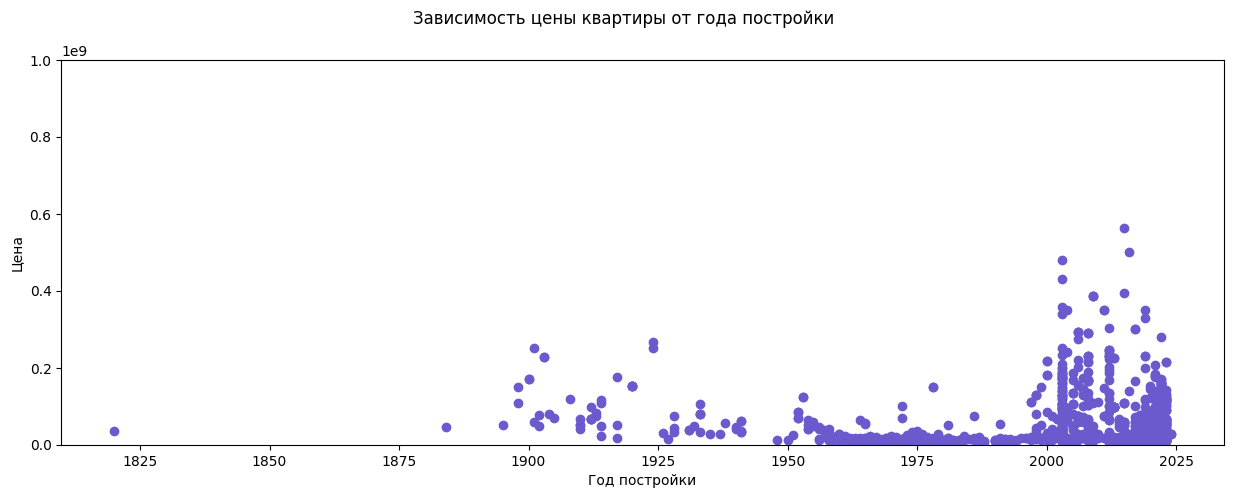

In [66]:
plt.figure(figsize=(15, 5))
plt.scatter(df['Год постройки'], df['Цена'], color='slateblue')
plt.ylim(0, 1000000000)
plt.suptitle('Зависимость цены квартиры от года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Цена')

plt.show()

Большая часть самых дорогих квартир была построена в начале 2000-2010 гг., самых дешевых - 1955 - 1995 гг.

Также узнаем, как зависит цена квартиры от времени от дома  до метро

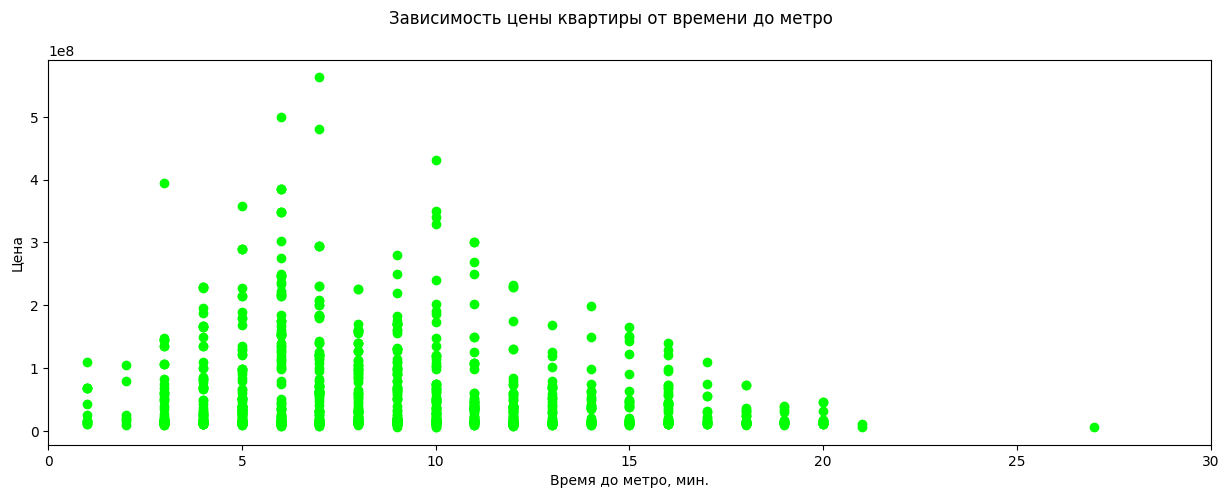

In [67]:
plt.figure(figsize=(15, 5))
plt.scatter(df['Время до метро, мин.'], df['Цена'], color='lime')
plt.xlim(0, 30)
plt.suptitle('Зависимость цены квартиры от времени до метро')
plt.xlabel('Время до метро, мин.')
plt.ylabel('Цена')
plt.show()

Самые дорогие квартиры находятся в 5-10 мин. от метро, что на наш взгляд, довольно странно, так как между показателями отрицательная линейная связь и квартиры, находящиеся в 1-5 мин. до метро должны стоить дороже, чем квартиры, находщиеся в 5-10 мин., но это не так

Узнаем, как взаимосвязаны количество санузлов в квартире и ее общая площадь

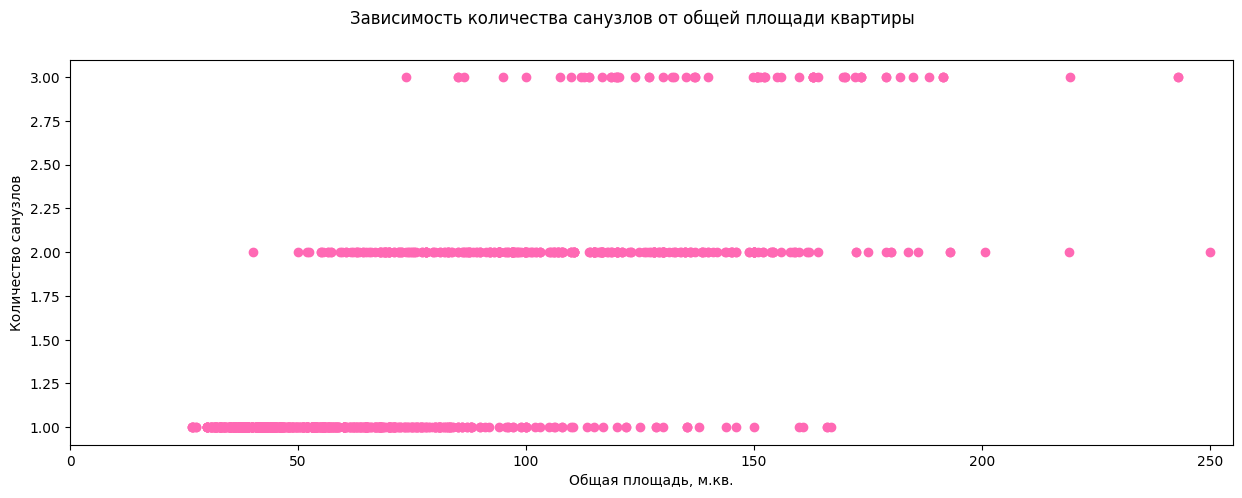

In [68]:
plt.figure(figsize=(15, 5))
plt.scatter(df['Общая площадь, м.кв.'], df['Количество санузлов'], color='hotpink')
plt.xlim(0,255)
plt.suptitle('Зависимость количества санузлов от общей площади квартиры')
plt.ylabel('Количество санузлов')
plt.xlabel('Общая площадь, м.кв.')
plt.show()

Из графика видим, что в квартирах площадью 100-150 м.кв. может быть как 1, так и 2 и 3 санузла, а в квартирах площадью 50-100 кв.м может быть как 1, так и 2 санузла.

## Гипотезы

На основе визуализаций и наблюдений на этапе EDA нами были выдвинуты следующие гипотезы: 
1. Самые дорогие квартиры находятся ближе к центру Москвы
2. Самые большие по площади квартиры находятся ближе к центру Москвы, а самые маленькие - ближе к окраинам
3. Чаще всего продают 3-комнатные квартиры
4. Доля квартир площадью менее 50 кв.м. больше доли квартир площадью больше 50 кв.м.
5. Самые большие квартиры были построены в 2000 - 2024гг.
6. Самые дорогие квартиры находятся в 5-10 мин. от метро
7. Самые дорогие квартиры были построены в 2000 - 2010гг.
8. Распределение общей площади квартир экспоненциальное
9. Количество подъездов незначительно влияет на другие показатели
10. В квартирах с общей площадью 100-150 кв.м в среднем больше санузлов, чем в квартирах с общей площадью 50-100 кв.м.

